# Loading the appropriate packages

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.optimize import fsolve


# loading in Data Set

In [2]:
A = [109, 112, 147, 147, 150, 151, 156, 160 ]
Z = [53, 55, 69, 69, 71, 71, 73, 75]
Q = [.829, .977, 1.071, 1.139, 1.285, 1.255 , 1.015, 1.250]
n = [1, 0 ,0 , 1 , 0, 0, 1, 1 ]
l = [2, 4 , 5, 2, 5, 5, 2, 2 ]
j = [5/2, 7/2, 11/2 , 3/2 , 11/2, 11/2 , 3/2, 3/2]
Gamma_exp = [1.09e-4 , 3.3e-5, 2.7, 3.6e-4, 1e-2, 1.2e-1, 1.65e-1, 8.7e-4]

print(len(A))
print(len(Z))
print(len(Q))
print(len(n))
print(len(l))
print(len(j))
print(len(Gamma_exp))

8
8
8
8
8
8
8


# Constants needed for the calculation

In [3]:
#constants
e = np.sqrt(1.4399764) #Mev fm
a  = 0.7 #fm 
hbar_mpi_c_squared = 2.044 # fm**2

hbar = 197.32 # 

# Potentals
V_0 = 54 # MeV
V_SO = 0.2 * V_0

mu  = 938

# Calculating the potential

In [4]:
def V_coul(r, Z, A):
    R = 1.2 * A**(1/3) # fm 
    if (r > R):
        result = (Z * e**2)/ r
    else:
        result = (Z* e**2) * (3  - (r/R)**2 )/(2 * R)
    return result

fws = lambda r : (1 + np.exp( (r - R)/a ))**-1
dfws_dr = lambda r : - (  np.exp((r- R) / a )/a ) * ( 1 + np.exp((r - R)/a) )**(-2)
l_dot_s  = lambda j, l : 1/2 *( j* (j + 1) - l * (l  + 1) - .5 * (1.5) )
V_ws = lambda r, j , l : - V_0 * fws(r) + V_SO * hbar_mpi_c_squared * (1/r) * dfws_dr(r) * l_dot_s(j , l)
V = lambda r , j , l , Z , A :  V_ws(r,j, l) + V_coul(r, Z, A) +  (hbar**2)/ (2 * r * mu**2)* (l * (l + 1 ))

# Testing to see if it works

In [5]:
c = 7
R = 1.2 * A[c]**(1/3) 

r_test = np.linspace(.1, 15, 1000)

V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]

E_test = [Q[c] for i in r_test.tolist()]

#for i in range(len(r_test)):
#    print( r_test[i], "     ", V_test[i], "    ", E_test[i])

#plt.plot(r_test, V_test)
#plt.plot(r_test, E_test, color = "red")
#plt.show()

#r_0 = [0.0045, ] 

# Finding the roots to integrate over

In [6]:
def r0_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] > E[i]) and (V[i] < E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_0 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.0001, 1, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_0.append(r0_finder(r_test, V_test, E_test))

print(r_0)

[0.003603153153153153, 0.013612162162162161, 0.020618468468468466, 0.004604054054054054, 0.020618468468468466, 0.020618468468468466, 0.004604054054054054, 0.004604054054054054]


In [7]:
def r1_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] < E[i]) and (V[i] > E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_1 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(.1, 15, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_1.append(r1_finder(r_test, V_test, E_test))

print(r_1)

[6.789339339339339, 6.565615615615616, 7.2964464464464465, 7.042892892892893, 7.3262762762762765, 7.341191191191191, 7.117467467467468, 7.177127127127127]


In [8]:
def r2_finder(r, V, E):

    results = 0

    for i in range(len(r)):
    
        if (V[i - 1] > E[i]) and (V[i] < E[i]):
            results  = r[i] - (r[i] - r[i - 1])/2


    return results

r_2 = []

for c  in range(len(j)):
    R = 1.2 * A[c]**(1/3) 
    r_test = np.linspace(8, 120, 1000)
    V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]
    E_test = [Q[c] for i in r_test.tolist()]
    r_2.append(r0_finder(r_test, V_test, E_test))

print(r_2)

[92.25225225225225, 81.4894894894895, 93.37337337337337, 87.31931931931932, 80.03203203203202, 81.93793793793793, 103.68768768768768, 86.53453453453454]


# Calculating the half - life 

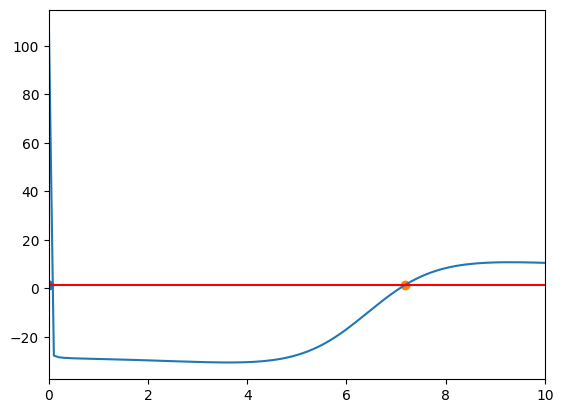

In [9]:
c = 7
R = 1.2 * A[c]**(1/3) 

r_test = np.linspace(.001, 100, 1000)

V_test = [V(i, j[c], l[c], Z[c], A[c] ) for i in r_test.tolist()]

E_test = [Q[c] for i in r_test.tolist()]

plt.scatter(r_0[c], Q[c])
plt.scatter(r_1[c], Q[c])    
plt.scatter(r_2[c], Q[c])    
#for i in range(len(r_test)):
#    print( r_test[i], "     ", V_test[i], "    ", E_test[i])

plt.plot(r_test, V_test)
plt.plot(r_test, E_test, color = "red")
plt.xlim(0,10)
#plt.ylim(-35,15)
plt.show()

#r_0 = [0.0045, ]
 

In [10]:
#spectroscoptic factor 
S = 1
Gamma_half =[]

for c in range (7):
    # Wave Number/ Vector etc
    R = 1.2 * A[c]**(1/3) 
    k = lambda r : np.sqrt(2 * mu * abs(Q[c] - V(r, j[c], l[c], Z[c], A[c] ))) / hbar

    #Calculating N
    dr = 1000
    r0_r1_mesh = np.linspace(r_0[c], r_1[c], dr )
    N_integrand= np.array([.5 * k(i) for i in r0_r1_mesh.tolist()])
    N = (np.sum(N_integrand)**-1) * dr
    N = N**-1 
    print(N)

    dr = 100
    r1_r2_mesh = np.linspace(r_1[c], r_2[c], dr )
    Gamma_integrand = np.array([k(i) for i in r1_r2_mesh.tolist()])
    
    

    gamma_value = np.log(2)/(S * N * (hbar**2/ (4 * mu)) * np.exp(- 2 *np.sum(Gamma_integrand) * dr))
    gamma_value = hbar * gamma_value

    Gamma_half.append( gamma_value )
print(Gamma_half)

0.5711576837004411
0.5584984280715074
0.5583026414978522
0.5552982803952946
0.5570952940586636
0.557298664395795
0.5502811770600048
[inf, inf, inf, inf, inf, inf, inf]


/tmp/ipykernel_27788/2385236466.py:24: RuntimeWarning: divide by zero encountered in scalar divide
  gamma_value = np.log(2)/(S * N * (hbar**2/ (4 * mu)) * np.exp(- 2 *np.sum(Gamma_integrand) * dr))


In [11]:
np.exp(- 2 *np.sum(Gamma_integrand) * dr)

0.0